# Heart Failure

In [3]:
# 필요한 라이브러리 import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 데이터 불러오기

In [4]:
# before R preprocessing (raw data)
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')
# after R preprocessing
clean_df = pd.read_csv('heart_failure_clean.csv')

# 데이터 확인
print(df.head())
print(clean_df.head())

    age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  75.0        0                       582         0                 20   
1  55.0        0                      7861         0                 38   
2  65.0        0                       146         0                 20   
3  50.0        1                       111         0                 20   
4  65.0        1                       160         1                 20   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    1  265000.00               1.9           130    1   
1                    0  263358.03               1.1           136    1   
2                    0  162000.00               1.3           129    1   
3                    0  210000.00               1.9           137    1   
4                    0  327000.00               2.7           116    0   

   smoking  time  DEATH_EVENT  
0        0     4            1  
1        0     6            1  
2       

### EDA(탐색적 데이터 분석)

In [5]:
# 한글 깨짐 방지
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54252 (\N{HANGUL SYLLABLE PO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


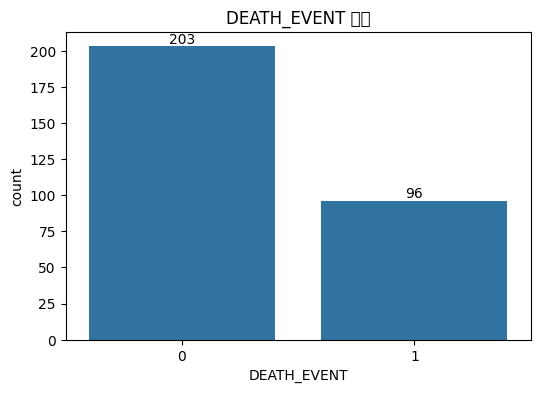

In [6]:
# 클래스 불균형 확인
plt.figure(figsize=(6,4))
ax = sns.countplot(x= df["DEATH_EVENT"], data=df)
ax.bar_label(ax.containers[0])
plt.title('DEATH_EVENT 분포')
plt.show()

203:96으로 0 클래스가 67.9%로 아주 약한 불균형

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 53945 (\N{HANGUL SYLLABLE TEUG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44036 (\N{HANGUL SYLLABLE GAN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44288 (\N{HANGUL SYLLABLE GWAN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


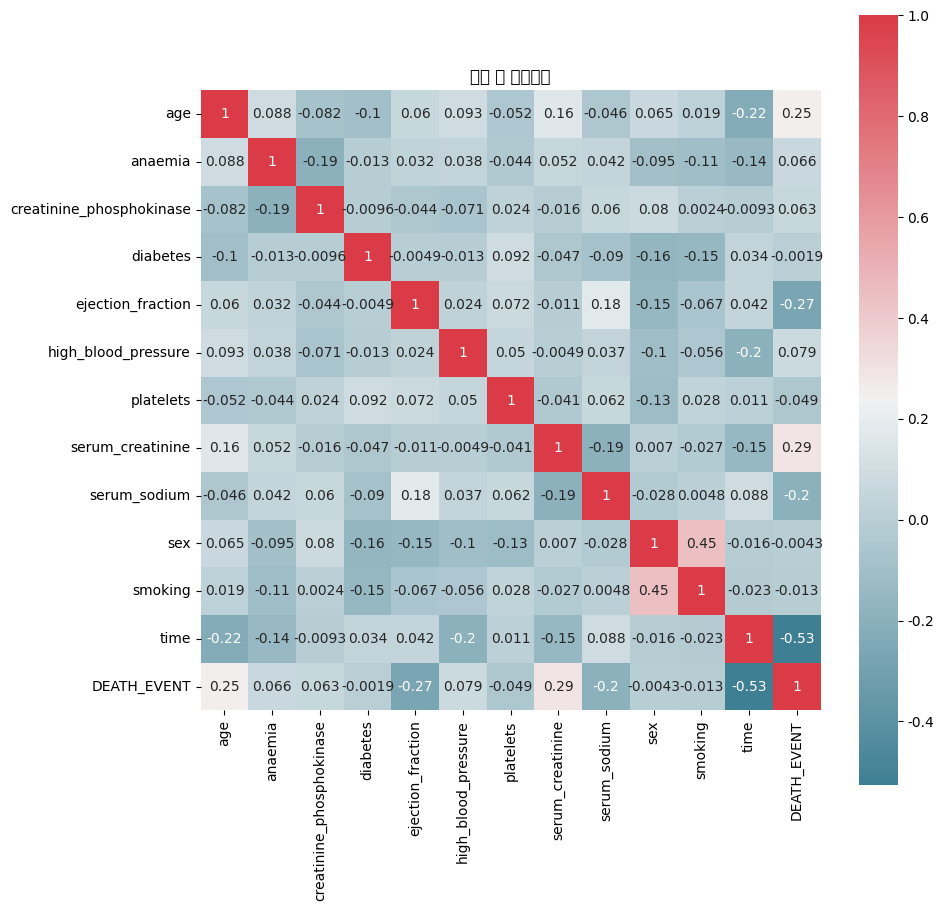

In [7]:
 # 상관계수 행렬(heatmap)
corrmat = df.corr()
cmap = sns.diverging_palette(220, 10, as_cmap=True)
plt.subplots(figsize=(10,10))
sns.heatmap(corrmat, cmap=cmap, annot=True, square=True)
plt.title('특성 간 상관계수')
plt.show()

age, ejection_fraction,serum_creatinine, serum_sodium, time가  
DEATH_EVENT와 0.2(약한 상관)이상


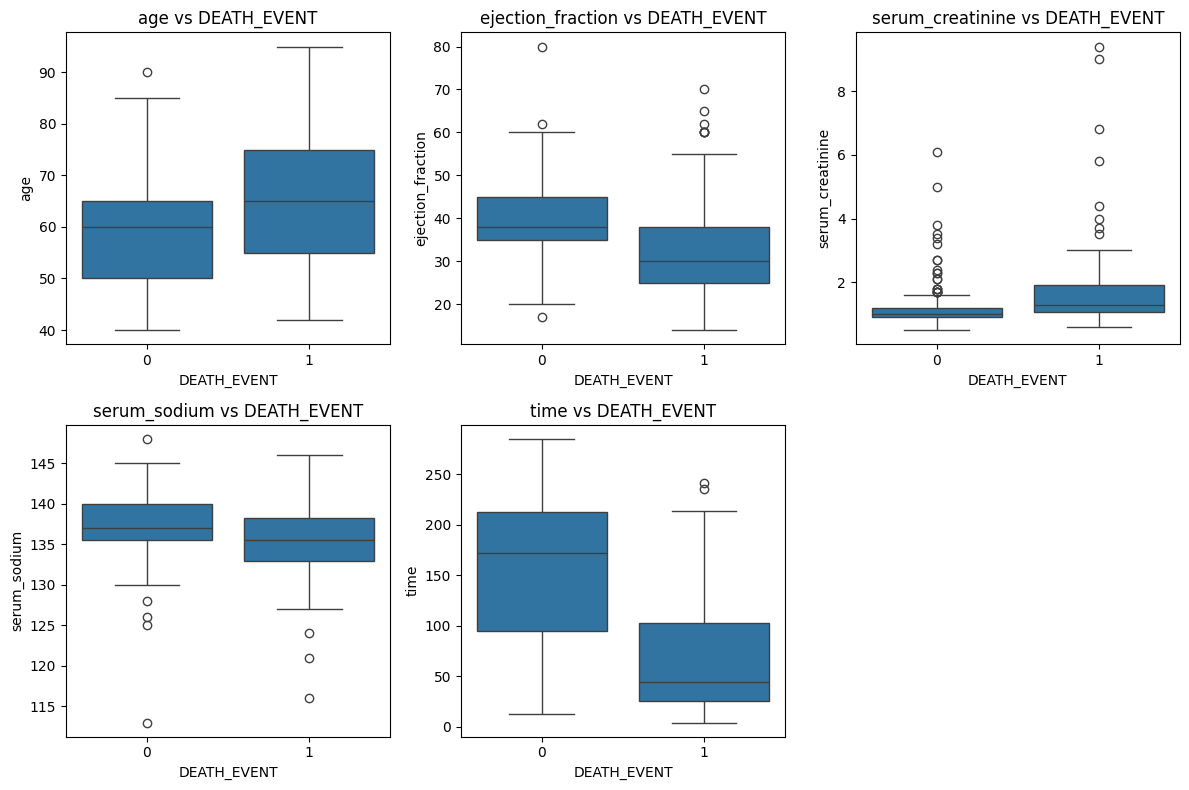

In [8]:
# 주요 수치형 변수의 이상치 확인 (Boxplot)
plt.figure(figsize=(12, 8))

features = ['age', 'ejection_fraction', 'serum_creatinine', 'serum_sodium', 'time']
for idx, feature in enumerate(features, 1):
    plt.subplot(2, 3, idx)
    sns.boxplot(x='DEATH_EVENT', y=feature, data=df)
    plt.title(f'{feature} vs DEATH_EVENT')

plt.tight_layout()
plt.show()

In [9]:
# 이상치 개수 확인 함수 (IQR 기준)
def find_outliers_iqr(data_column):
    q1 = np.percentile(data_column, 25)
    q3 = np.percentile(data_column, 75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = np.where((data_column < lower_bound) | (data_column > upper_bound))[0]
    return outliers

# Clean_df에 대해 이상치 개수 확인
def count_outliers_iqr(data):
    total_outliers = 0
    for column in data.columns:
        outliers = find_outliers_iqr(data[column])
        print(f"IQR 이상치 ({column}): {len(outliers)} 개")
        total_outliers += len(outliers)
    print(f"총 이상치 개수: {total_outliers} 개")

count_outliers_iqr(clean_df)

IQR 이상치 (age): 0 개
IQR 이상치 (anaemia): 0 개
IQR 이상치 (creatinine_phosphokinase): 29 개
IQR 이상치 (diabetes): 0 개
IQR 이상치 (ejection_fraction): 2 개
IQR 이상치 (high_blood_pressure): 0 개
IQR 이상치 (platelets): 21 개
IQR 이상치 (serum_creatinine): 29 개
IQR 이상치 (serum_sodium): 4 개
IQR 이상치 (sex): 0 개
IQR 이상치 (smoking): 0 개
IQR 이상치 (time): 0 개
IQR 이상치 (DEATH_EVENT): 0 개
IQR 이상치 (High_blood_pressure): 0 개
IQR 이상치 (ct_gr): 72 개
총 이상치 개수: 157 개


serum_creatinine -> 그룹화

In [10]:
# 사용 변수 선택(유의미한 변수만 선택)
use_df = clean_df[['age','ejection_fraction','serum_sodium','time','ct_gr','DEATH_EVENT']]
use_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                299 non-null    float64
 1   ejection_fraction  299 non-null    int64  
 2   serum_sodium       299 non-null    int64  
 3   time               299 non-null    int64  
 4   ct_gr              299 non-null    int64  
 5   DEATH_EVENT        299 non-null    int64  
dtypes: float64(1), int64(5)
memory usage: 14.1 KB


### 학습/테스트 데이터 분리 및 SMOTE 준비

In [11]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA

In [12]:
# 특성과 레이블 분리
X = use_df.drop(["DEATH_EVENT"],axis=1)
y = use_df['DEATH_EVENT']

In [13]:
# train/test 데이터 분리
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

### SMOTE

In [14]:
# SMOTE 적용
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

<ipython-input-15-59729bf54547>:21: UserWarning: Glyph 51201 (\N{HANGUL SYLLABLE JEOG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-15-59729bf54547>:21: UserWarning: Glyph 50857 (\N{HANGUL SYLLABLE YONG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-15-59729bf54547>:21: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-15-59729bf54547>:21: UserWarning: Glyph 54980 (\N{HANGUL SYLLABLE HU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51201 (\N{HANGUL SYLLABLE JEOG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50857 (\N{HANGUL SYLLABLE YONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist

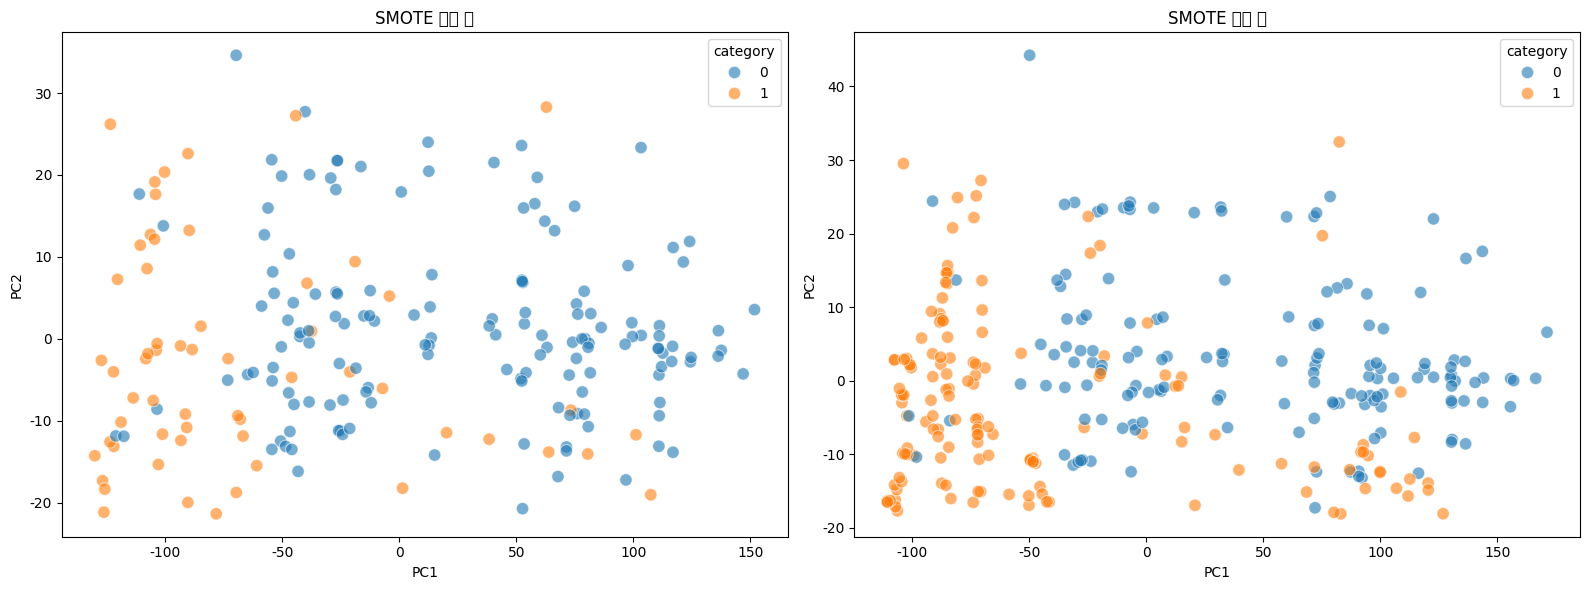

In [15]:
# 1. SMOTE 적용 전
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
df_before = pd.DataFrame(X_train_pca, columns=['PC1', 'PC2'])
df_before['category'] = y_train.values

# 2. SMOTE 적용 후
X_train_smote_pca = pca.fit_transform(X_train_smote)
df_after = pd.DataFrame(X_train_smote_pca, columns=['PC1', 'PC2'])
df_after['category'] = y_train_smote.values

# 3. 각각 시각화
fig, axes = plt.subplots(1, 2, figsize=(16,6))

sns.scatterplot(data=df_before, x='PC1', y='PC2', hue='category', alpha=0.6, s=80, ax=axes[0])
axes[0].set_title('SMOTE 적용 전')

sns.scatterplot(data=df_after, x='PC1', y='PC2', hue='category', alpha=0.6, s=80, ax=axes[1])
axes[1].set_title('SMOTE 적용 후')

plt.tight_layout()
plt.show()

SMOTE 적용후 소수 클래스(1) 증가 확인

### 모델링

In [16]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import classification_report

In [17]:
# StratifiedKFold 설정(5-fold)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

### Random Forest

In [18]:
from sklearn.ensemble import RandomForestClassifier

In [19]:
# Random Forest 모델 생성
model_rf = RandomForestClassifier(random_state=42)

In [20]:
# 파라미터 범위 지정
param_rf = {
    "n_estimators": [500, 1000, 1500],
    "max_depth": [5, 10, 15],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}


In [21]:
# grid serch 통해 최적 파라미터 저장
gscv_rf = GridSearchCV(model_rf, param_rf, cv=cv, n_jobs=-1, scoring='accuracy')
gscv_rf.fit(X_train_smote, y_train_smote)

MODEL_RF = gscv_rf.best_estimator_

pred_rf = MODEL_RF.predict(X_test)
print("Random Forest 결과")
print(classification_report(y_test, pred_rf))

Random Forest 결과
              precision    recall  f1-score   support

           0       0.77      0.81      0.79        53
           1       0.71      0.65      0.68        37

    accuracy                           0.74        90
   macro avg       0.74      0.73      0.73        90
weighted avg       0.74      0.74      0.74        90



In [22]:
MODEL_RF

RandomForestClassifier(max_depth=10, min_samples_leaf=2, n_estimators=500,
                       random_state=42)

### DecisionTree

In [23]:
from sklearn.tree import DecisionTreeClassifier

In [24]:
# DecisionTree 모델 생성
model_dt = DecisionTreeClassifier(random_state=42)

In [25]:
# 파라미터 범위 지정
param_dt = {
    "max_depth": [3, 5, 10, 15],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 5]
}

In [26]:
# grid serch 통해 최적 파라미터 저장
gscv_dt = GridSearchCV(model_dt, param_dt, cv=cv, n_jobs=-1, scoring='accuracy')
gscv_dt.fit(X_train_smote, y_train_smote)

MODEL_DT = gscv_dt.best_estimator_

pred_dt = MODEL_DT.predict(X_test)
print("Decision Tree Test 결과")
print(classification_report(y_test, pred_dt))

Decision Tree Test 결과
              precision    recall  f1-score   support

           0       0.69      0.79      0.74        53
           1       0.62      0.49      0.55        37

    accuracy                           0.67        90
   macro avg       0.65      0.64      0.64        90
weighted avg       0.66      0.67      0.66        90



In [27]:
MODEL_DT

DecisionTreeClassifier(max_depth=5, min_samples_split=5, random_state=42)

### SVM

In [28]:
from sklearn.svm import SVC

In [29]:
# SVM 모델 생성
model_svm = SVC(probability=True, random_state=42)

In [30]:
# 파라미터 범위 설정
param_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

In [31]:
# grid serch 통해 최적 파라미터 저장
gscv_svm = GridSearchCV(model_svm, param_svm, cv=cv, n_jobs=-1, scoring='accuracy')
gscv_svm.fit(X_train_smote, y_train_smote)

MODEL_SVM = gscv_svm.best_estimator_

pred_svm = MODEL_SVM.predict(X_test)
print("SVM Test 결과")
print(classification_report(y_test, pred_svm))

SVM Test 결과
              precision    recall  f1-score   support

           0       0.78      0.92      0.84        53
           1       0.85      0.62      0.72        37

    accuracy                           0.80        90
   macro avg       0.81      0.77      0.78        90
weighted avg       0.81      0.80      0.79        90



In [32]:
MODEL_SVM

SVC(C=1, probability=True, random_state=42)

### Logistic Regression

In [33]:
from sklearn.linear_model import LogisticRegression

In [34]:
# logistic regreesion 모델 생성
model_logreg = LogisticRegression(random_state=42)

In [35]:
param_logreg = {
    'C': [0.1, 1, 10, 100],
    'penalty': ['l2']
}

In [36]:
gscv_logreg = GridSearchCV(model_logreg, param_logreg, cv=cv, n_jobs=-1, scoring='accuracy')
gscv_logreg.fit(X_train_smote, y_train_smote)

MODEL_LOGREG = gscv_logreg.best_estimator_

pred_logreg = MODEL_LOGREG.predict(X_test)
print("Logistic Regression Test 결과")
print(classification_report(y_test, pred_logreg))

Logistic Regression Test 결과
              precision    recall  f1-score   support

           0       0.82      0.75      0.78        53
           1       0.68      0.76      0.72        37

    accuracy                           0.76        90
   macro avg       0.75      0.76      0.75        90
weighted avg       0.76      0.76      0.76        90



In [37]:
MODEL_LOGREG

LogisticRegression(C=10, random_state=42)

### LGBM

In [38]:
from lightgbm import LGBMClassifier

In [39]:
model_lgbm = LGBMClassifier(random_state=42)

In [40]:
param_lgbm = {
    'n_estimators': [500, 1000, 2000],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7, 9],
    'num_leaves': [15, 31, 63],
    'min_child_samples': [10, 20, 30]
}

In [41]:
gscv_lgbm = GridSearchCV(model_lgbm, param_lgbm, cv=cv, n_jobs=-1, scoring='accuracy')
gscv_lgbm.fit(X_train_smote, y_train_smote)

MODEL_LGBM = gscv_lgbm.best_estimator_

y_pred_lgbm = MODEL_LGBM.predict(X_test)
print("LGBM Test 결과")
print(classification_report(y_test, y_pred_lgbm))

[LightGBM] [Info] Number of positive: 150, number of negative: 150
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000060 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 182
[LightGBM] [Info] Number of data points in the train set: 300, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with 

In [42]:
from sklearn.neural_network import MLPClassifier

In [43]:
model_ann = MLPClassifier(random_state=42, max_iter=500)

In [44]:
param_ann = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50)],
    'activation': ['relu', 'tanh'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'adaptive']
}

In [45]:
gscv_ann = GridSearchCV(model_ann, param_ann, cv=cv, n_jobs=-1, scoring='accuracy')
gscv_ann.fit(X_train_smote, y_train_smote)

MODEL_ANN = gscv_ann.best_estimator_

y_pred_ann = MODEL_ANN.predict(X_test)
print("ANN Test 결과")
print(classification_report(y_test, y_pred_ann))

ANN Test 결과
              precision    recall  f1-score   support

           0       0.74      0.79      0.76        53
           1       0.67      0.59      0.63        37

    accuracy                           0.71        90
   macro avg       0.70      0.69      0.70        90
weighted avg       0.71      0.71      0.71        90



## 모델 성능 비교

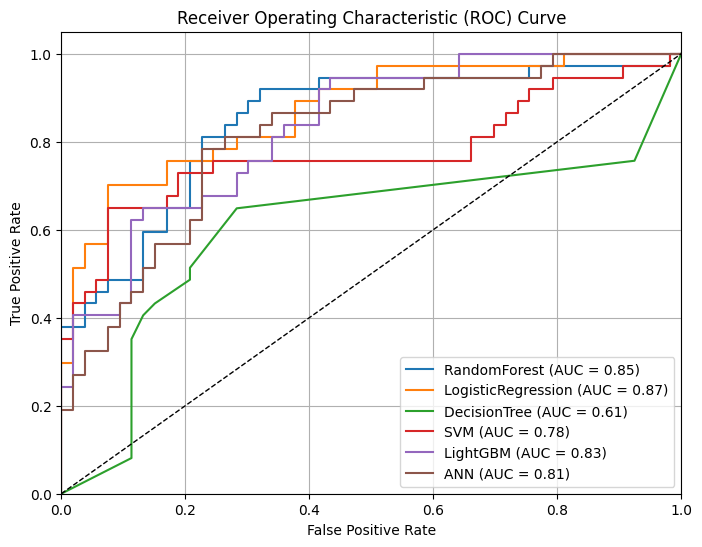

In [48]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc
import pandas as pd
import matplotlib.pyplot as plt

# 모델 리스트 저장
models = {
    'RandomForest': MODEL_RF,
    'LogisticRegression': MODEL_LOGREG,
    'DecisionTree': MODEL_DT,
    'SVM': MODEL_SVM,
    'LightGBM': MODEL_LGBM,
    'ANN': MODEL_ANN
}

# 결과 저장용 리스트
results = []

# ROC Curve 그리기
fig, ax = plt.subplots(figsize=(8, 6))

for name, model in models.items():
    # 예측 확률과 클래스 예측
    y_pred = model.predict(X_test)
    y_score = model.predict_proba(X_test)[:, 1]

    # 각각의 지표 계산
    acc = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_score)

    # 결과 저장
    results.append({
        'Model': name,
        'Accuracy': acc,
        'Precision': precision,
        'Recall': recall,
        'F1-score': f1,
        'AUC': roc_auc
    })

    # ROC Curve 계산 및 그리기
    fpr, tpr, _ = roc_curve(y_test, y_score)
    ax.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

ax.plot([0, 1], [0, 1], 'k--', lw=1)
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('Receiver Operating Characteristic (ROC) Curve')
ax.legend(loc='lower right')
plt.grid()
plt.show()


In [49]:
# 결과를 데이터프레임으로 정리
results_df = pd.DataFrame(results)

# AUC 기준으로 정렬
results_df = results_df.sort_values(by='AUC', ascending=False).reset_index(drop=True)

# 결과 출력
print(results_df)

                Model  Accuracy  Precision    Recall  F1-score       AUC
0  LogisticRegression  0.755556   0.682927  0.756757  0.717949  0.868944
1        RandomForest  0.744444   0.705882  0.648649  0.676056  0.846507
2            LightGBM  0.755556   0.727273  0.648649  0.685714  0.831719
3                 ANN  0.711111   0.666667  0.594595  0.628571  0.813361
4                 SVM  0.800000   0.851852  0.621622  0.718750  0.775625
5        DecisionTree  0.666667   0.620690  0.486486  0.545455  0.606578
